In [1]:
def trainDataSet(predicted_depth, predicted_magnitude):
    import numpy as np
    import pandas as pd
    import datetime
    import time
    from sklearn.model_selection import train_test_split
    from sklearn.ensemble import RandomForestRegressor
    import matplotlib.pyplot as plt
    import seaborn as sns
    data=pd.read_csv("/Users/bilal/Downloads/database.csv")
    data.head()
    data = data[['Date', 'Time', 'Latitude', 'Longitude', 'Depth', 'Magnitude']]
    timestamp = []
    for d, t in zip(data['Date'], data['Time']):
        try:
            ts = datetime.datetime.strptime(d+' '+t, '%m/%d/%Y %H:%M:%S')
            timestamp.append(time.mktime(ts.timetuple()))
        except ValueError:
            # print('ValueError')
            timestamp.append('ValueError')

    timeStamp = pd.Series(timestamp)
    data['Timestamp'] = timeStamp.values
    final_data = data.drop(['Date', 'Time'], axis=1)
    final_data = final_data[final_data.Timestamp != 'ValueError']
    final_data.head()
    X = final_data[['Timestamp', 'Latitude', 'Longitude', 'Magnitude', 'Depth']]
    y = final_data[['Magnitude', 'Depth']]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6) #Random State 6 gives best result for this case
    reg = RandomForestRegressor(random_state=6)
    reg.fit(X_train, y_train)
    reg.predict(X_test)
    reg.score(X_test, y_test)
    plt.hist(data['Magnitude'])
    plt.xlabel('Magnitude Size')
    plt.ylabel('Number of Occurrences')
    plt.title('Magniture size vs Number of occurrences', fontweight = 20, fontsize = 10)
    plt.show()
    data['date']=data['Date'].apply(lambda x: pd.to_datetime(x))
    data['year']=data['date'].apply(lambda x:str(x).split('-')[0])
    plt.figure(figsize=(25,8))
    sns.set(font_scale=1.0)
    sns.countplot(x="year",data=data)
    plt.ylabel('Number of Earthquakes')
#     predictEarthQuake(predicted_depth, predicted_magnitude)


    # data

    currentLongitude=24.8607
    currentLatitude=67.0011
    date='01/02/2023'
    time_str='09:30:18'
    depth=predicted_depth
    magnitude=predicted_magnitude
    # depth=5.1111970548639825
    # magnitude=5.135231122357826

    # Convert date and time to timestamp
    ts = datetime.datetime.strptime(date + ' ' + time_str, '%m/%d/%Y %H:%M:%S')
    timestamp = time.mktime(ts.timetuple())

    # Create a DataFrame with your data
    live_data = pd.DataFrame({
        'Timestamp': [timestamp],
        'Latitude': [currentLatitude],
        'Longitude': [currentLongitude],
        'Magnitude': [magnitude],
        'Depth': [depth]
    })

    # Use the trained model to predict 'Magnitude' and 'Depth'
    live_labels = reg.predict(live_data)

    # live_labels now contains the predicted 'Magnitude' and 'Depth'
    print(f'The predicted magnitude is {live_labels[0][0]} MW (Moment magnitude)')
    print(f'The predicted depth is {live_labels[0][1]}')

In [2]:
def convertAccToMagnitudeAndDepth(acc):
    import numpy as np
    from sklearn.linear_model import LinearRegression

    # Generate some random acceleration data
    acceleration = np.random.normal(loc=0.0, scale=1.0, size=1000)

    # Generate some random depth and magnitude data
    # In a real scenario, you would use actual depth and magnitude data that corresponds to the acceleration data
    depth = np.random.normal(loc=5.0, scale=2.0, size=1000)
    magnitude = np.random.normal(loc=5.0, scale=2.0, size=1000)

    # Combine depth and magnitude into a single array
    targets = np.column_stack((depth, magnitude))

    # Train a model
    model = LinearRegression()
    model.fit(acceleration.reshape(-1, 1), targets)

    # Now you can use the model to predict depth and magnitude based on live acceleration data from your Arduino
    # Let's assume you have this value from your Arduino
    live_acceleration = acc #1.0020  # replace with actual value

    # Predict the depth and magnitude
    predicted_depth, predicted_magnitude = model.predict(np.array([[live_acceleration]]))[0]

#     print(f'The predicted depth is {predicted_depth}')
#     print(f'The predicted magnitude is {predicted_magnitude}')
    return {
        'predicted_depth': predicted_depth,
        'predicted_magnitude': predicted_magnitude
    }



In [3]:
def predictEarthQuake(predicted_depth, predicted_magnitude):
    

SyntaxError: incomplete input (97553172.py, line 2)

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:8002
Press CTRL+C to quit
127.0.0.1 - - [26/Jul/2023 02:25:06] "OPTIONS /api/data HTTP/1.1" 200 -


b'{"H":"83.0114","T":"34.2446","A":"0.9692"}'
{'H': '83.0114', 'T': '34.2446', 'A': '0.9692'}
acceleration:  0.9692


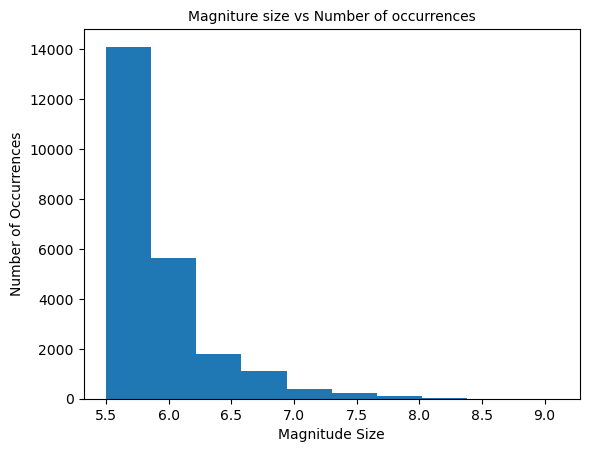

127.0.0.1 - - [26/Jul/2023 02:25:12] "POST /api/data HTTP/1.1" 200 -


The predicted magnitude is 5.501 MW (Moment magnitude)
The predicted depth is 4.975900000000004


In [ ]:
from flask import Flask, request, jsonify
from flask_cors import CORS

app = Flask(__name__)
CORS(app)

@app.route('/api/data', methods=['POST'])
def receive_data():
    print(request.data)  # Print the raw request data
    data = request.get_json()  # Get JSON data sent from the client
    print(data)  # Print the data to the console (or process it as needed)
    print('acceleration: ', data['A'])
    trainDataSet(convertAccToMagnitudeAndDepth(float(data['A']))['predicted_depth'], convertAccToMagnitudeAndDepth(float(data['A']))['predicted_magnitude'])
    return jsonify({'message': 'Data received successfully'}), 200  # Send a response back to the client

if __name__ == '__main__':
    app.run(debug=False, port=8002)
# , port=5002